# Attention Model bias analysis

This notebook evaluates the attention models against the same metrics in [Model Bias Analysis](Model%20bias%20analysis.ipynb). There is not a big difference until you get to the fairness metrics at the bottom as well as in the [Pinned AUC Demo Notebook](Attention_pinned_auc_demo.ipynb)

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import model_tool
import model_bias_analysis

# autoreload makes it easier to interactively work on code in the model_bias_analysis module.
%load_ext autoreload
%autoreload 2

/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


HELLO from model_tool


In [3]:
%ls ./eval_datasets

bias_madlibs_77k.csv           bias_madlibs_89k_scored.csv
bias_madlibs_77k_scored_2.csv  toxicity_fuzzed_testset.csv
bias_madlibs_77k_scored.csv    toxicity_nonfuzzed_testset.csv
bias_madlibs_89k.csv


In [19]:
%%time

MODEL_DIR = '../models/'

# Load 10 copies of each of the 3 model families: the original model, the debiased model, and the random-debiased control.

atn_random_model_names = ['atn_cnn_random_tox_v4_{}'.format(i) for i in xrange(100, 110)]
atn_random_models = [model_tool.AttentionToxModel(name) for name in atn_random_model_names]

atn_wiki_model_names = ['atn_cnn_wiki_tox_v4_{}'.format(i) for i in xrange(100, 110)]
atn_wiki_models = [model_tool.AttentionToxModel(name) for name in atn_wiki_model_names]

atn_debias_model_names = ['atn_cnn_debias_tox_v4_{}'.format(i) for i in xrange(100, 110)]
atn_debias_models = [model_tool.AttentionToxModel(name) for name in atn_debias_model_names]

wiki_model_names = ['wiki_cnn_v3_{}'.format(i) for i in xrange(100, 110)]
wiki_models = [model_tool.ToxModel(name) for name in wiki_model_names]

random_model_names = ['wiki_debias_random_cnn_v3_{}'.format(i) for i in xrange(100, 110)]
random_models = [model_tool.ToxModel(name) for name in random_model_names]

debias_model_names = ['wiki_debias_cnn_v3_{}'.format(i) for i in xrange(100, 110)]
debias_models = [model_tool.ToxModel(name) for name in debias_model_names]



Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 20
cnn_filter_sizes: [128, 128, 128]
batch_size: 128
model_name: atn_cnn_random_tox_v4_100
max_sequence_length: 250
stop_early: True
embedding_trainable: False

Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 20
cnn_filter_sizes: [128, 128, 128]
batch_size: 128
model_name: atn_cnn_random_tox_v4_101
max_sequence_length: 250
stop_early: True
embedding_trainable: False

Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 20
cnn_filte

Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 20
cnn_filter_sizes: [128, 128, 128]
batch_size: 128
model_name: atn_cnn_debias_tox_v4_102
max_sequence_length: 250
stop_early: True
embedding_trainable: False

Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 20
cnn_filter_sizes: [128, 128, 128]
batch_size: 128
model_name: atn_cnn_debias_tox_v4_103
max_sequence_length: 250
stop_early: True
embedding_trainable: False

Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 20
cnn_filte

Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 20
cnn_filter_sizes: [128, 128, 128]
batch_size: 128
model_name: cnn_debias_random_tox_v3_104
max_sequence_length: 250
stop_early: True
embedding_trainable: False

Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 20
cnn_filter_sizes: [128, 128, 128]
batch_size: 128
model_name: cnn_debias_random_tox_v3_105
max_sequence_length: 250
stop_early: True
embedding_trainable: False

Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 20
cnn

ResourceExhaustedError: OOM when allocating tensor with shape[156608,100]
	 [[Node: embedding_27_3/embeddings/Assign = Assign[T=DT_FLOAT, _class=["loc:@embedding_27_3/embeddings"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](embedding_27_3/embeddings, embedding_27_3/random_uniform)]]

Caused by op u'embedding_27_3/embeddings/Assign', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2828, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-1c0da2c3ddde>", line 1, in <module>
    get_ipython().run_cell_magic(u'time', u'', u"\nMODEL_DIR = '../models/'\n\n# Load 10 copies of each of the 3 model families: the original model, the debiased model, and the random-debiased control.\n\natn_random_model_names = ['atn_cnn_random_tox_v4_{}'.format(i) for i in xrange(100, 110)]\natn_random_models = [model_tool.AttentionToxModel(name) for name in atn_random_model_names]\n\natn_wiki_model_names = ['atn_cnn_wiki_tox_v4_{}'.format(i) for i in xrange(100, 110)]\natn_wiki_models = [model_tool.AttentionToxModel(name) for name in atn_wiki_model_names]\n\natn_debias_model_names = ['atn_cnn_debias_tox_v4_{}'.format(i) for i in xrange(100, 110)]\natn_debias_models = [model_tool.AttentionToxModel(name) for name in atn_debias_model_names]\n\nwiki_model_names = ['wiki_cnn_v3_{}'.format(i) for i in xrange(100, 110)]\nwiki_models = [model_tool.ToxModel(name) for name in wiki_model_names]\n\nrandom_model_names = ['wiki_debias_random_cnn_v3_{}'.format(i) for i in xrange(100, 110)]\nrandom_models = [model_tool.ToxModel(name) for name in random_model_names]\n\ndebias_model_names = ['wiki_debias_cnn_v3_{}'.format(i) for i in xrange(100, 110)]\ndebias_models = [model_tool.ToxModel(name) for name in debias_model_names]\n")
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2117, in run_cell_magic
    result = fn(magic_arg_s, cell)
  File "<decorator-gen-60>", line 2, in time
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/IPython/core/magic.py", line 188, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/IPython/core/magics/execution.py", line 1185, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 22, in <module>
  File "model_tool.py", line 118, in __init__
    self.load_model_from_name(model_name)
  File "model_tool.py", line 143, in load_model_from_name
    os.path.join(self.model_dir, '%s_model.h5' % model_name))
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/keras/models.py", line 239, in load_model
    model = model_from_config(model_config, custom_objects=custom_objects)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/keras/models.py", line 313, in model_from_config
    return layer_module.deserialize(config, custom_objects=custom_objects)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/keras/layers/__init__.py", line 54, in deserialize
    printable_module_name='layer')
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/keras/utils/generic_utils.py", line 139, in deserialize_keras_object
    list(custom_objects.items())))
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/keras/engine/topology.py", line 2497, in from_config
    process_node(layer, node_data)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/keras/engine/topology.py", line 2454, in process_node
    layer(input_tensors[0], **kwargs)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/keras/engine/topology.py", line 575, in __call__
    self.build(input_shapes[0])
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/keras/layers/embeddings.py", line 101, in build
    dtype=self.dtype)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/keras/legacy/interfaces.py", line 87, in wrapper
    return func(*args, **kwargs)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/keras/engine/topology.py", line 399, in add_weight
    constraint=constraint)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py", line 316, in variable
    v = tf.Variable(value, dtype=_convert_string_dtype(dtype), name=name)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/tensorflow/python/ops/variables.py", line 213, in __init__
    constraint=constraint)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/tensorflow/python/ops/variables.py", line 346, in _init_from_args
    validate_shape=validate_shape).op
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/tensorflow/python/ops/state_ops.py", line 276, in assign
    validate_shape=validate_shape)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/tensorflow/python/ops/gen_state_ops.py", line 57, in assign
    use_locking=use_locking, name=name)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[156608,100]
	 [[Node: embedding_27_3/embeddings/Assign = Assign[T=DT_FLOAT, _class=["loc:@embedding_27_3/embeddings"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](embedding_27_3/embeddings, embedding_27_3/random_uniform)]]


In [20]:
all_model_families = [wiki_models, random_models, debias_models, atn_random_models, atn_wiki_models, atn_debias_models]
all_model_families_names = [wiki_model_names, random_model_names, debias_model_names, atn_random_model_names, atn_wiki_model_names, atn_debias_model_names]

## Load datasets

In [21]:
all_models = wiki_models + random_models + debias_models + atn_random_models + atn_wiki_models + atn_debias_models

In [22]:
%%time

madlibs = model_tool.load_maybe_score(
    all_models,
    orig_path='./eval_datasets/bias_madlibs_77k.csv',
    scored_path='./eval_datasets/bias_madlibs_77k_scored_4.csv',
    postprocess_fn=model_tool.postprocess_madlibs)


2018-03-06 16:56:53.533288 Scoring with wiki_cnn_v3_100...
2018-03-06 16:57:06.980912 Scoring with wiki_cnn_v3_101...
2018-03-06 16:57:20.316517 Scoring with wiki_cnn_v3_102...
2018-03-06 16:57:33.761898 Scoring with wiki_cnn_v3_103...
2018-03-06 16:57:47.117432 Scoring with wiki_cnn_v3_104...
2018-03-06 16:58:00.551618 Scoring with wiki_cnn_v3_105...
2018-03-06 16:58:13.982490 Scoring with wiki_cnn_v3_106...
2018-03-06 16:58:27.476025 Scoring with wiki_cnn_v3_107...
2018-03-06 16:58:40.864676 Scoring with wiki_cnn_v3_108...
2018-03-06 16:58:54.314938 Scoring with wiki_cnn_v3_109...
2018-03-06 16:59:07.662679 Scoring with wiki_debias_random_cnn_v3_100...
2018-03-06 16:59:21.091607 Scoring with wiki_debias_random_cnn_v3_101...
2018-03-06 16:59:34.465497 Scoring with wiki_debias_random_cnn_v3_102...
2018-03-06 16:59:47.866888 Scoring with wiki_debias_random_cnn_v3_103...
2018-03-06 17:00:01.363966 Scoring with wiki_debias_random_cnn_v3_104...
2018-03-06 17:00:14.745961 Scoring with wiki_

In [23]:
%%time

wiki_test = model_tool.load_maybe_score(
    all_models,
    orig_path='../data/wiki_test.csv',
    scored_path='../data/wiki_test_scored_4.csv',
    postprocess_fn=model_tool.postprocess_wiki_dataset)

2018-03-06 17:10:05.185041 Scoring with wiki_cnn_v3_100...
2018-03-06 17:10:10.678913 Scoring with wiki_cnn_v3_101...
2018-03-06 17:10:16.080248 Scoring with wiki_cnn_v3_102...
2018-03-06 17:10:21.504839 Scoring with wiki_cnn_v3_103...
2018-03-06 17:10:26.949366 Scoring with wiki_cnn_v3_104...
2018-03-06 17:10:32.368148 Scoring with wiki_cnn_v3_105...
2018-03-06 17:10:37.780433 Scoring with wiki_cnn_v3_106...
2018-03-06 17:10:43.159294 Scoring with wiki_cnn_v3_107...
2018-03-06 17:10:48.591458 Scoring with wiki_cnn_v3_108...
2018-03-06 17:10:53.961297 Scoring with wiki_cnn_v3_109...
2018-03-06 17:10:59.384746 Scoring with wiki_debias_random_cnn_v3_100...
2018-03-06 17:11:04.767718 Scoring with wiki_debias_random_cnn_v3_101...
2018-03-06 17:11:10.149491 Scoring with wiki_debias_random_cnn_v3_102...
2018-03-06 17:11:15.586590 Scoring with wiki_debias_random_cnn_v3_103...
2018-03-06 17:11:21.053878 Scoring with wiki_debias_random_cnn_v3_104...
2018-03-06 17:11:26.492580 Scoring with wiki_

In [24]:
%%time

wiki_debias_test = model_tool.load_maybe_score(
    all_models,
    orig_path='../data/wiki_debias_test.csv',
    scored_path='../data/wiki_debias_test_scored_4.csv',
    postprocess_fn=model_tool.postprocess_wiki_dataset)

wiki_random_test = model_tool.load_maybe_score(
    all_models,
    orig_path='../data/wiki_debias_random_test.csv',
    scored_path='../data/wiki_debias_random_test_scored_4.csv',
    postprocess_fn=model_tool.postprocess_wiki_dataset)

2018-03-06 17:15:36.071128 Scoring with wiki_cnn_v3_100...
2018-03-06 17:15:41.646774 Scoring with wiki_cnn_v3_101...
2018-03-06 17:15:47.216176 Scoring with wiki_cnn_v3_102...
2018-03-06 17:15:52.803640 Scoring with wiki_cnn_v3_103...
2018-03-06 17:15:58.365605 Scoring with wiki_cnn_v3_104...
2018-03-06 17:16:04.021787 Scoring with wiki_cnn_v3_105...
2018-03-06 17:16:09.585448 Scoring with wiki_cnn_v3_106...
2018-03-06 17:16:15.197591 Scoring with wiki_cnn_v3_107...
2018-03-06 17:16:20.778241 Scoring with wiki_cnn_v3_108...
2018-03-06 17:16:41.305618 Scoring with wiki_cnn_v3_109...
2018-03-06 17:16:46.887357 Scoring with wiki_debias_random_cnn_v3_100...
2018-03-06 17:16:52.455479 Scoring with wiki_debias_random_cnn_v3_101...
2018-03-06 17:16:58.096408 Scoring with wiki_debias_random_cnn_v3_102...
2018-03-06 17:17:03.768469 Scoring with wiki_debias_random_cnn_v3_103...
2018-03-06 17:17:09.345368 Scoring with wiki_debias_random_cnn_v3_104...
2018-03-06 17:17:14.973423 Scoring with wiki_

## AUC

The overall AUC on the madlibs dataset from the [original model bias analysis](Model%20bias%20analysis.ipynb) started at 0.956 to 0.973 for the debiased model.


The original model with attention comes in at 0.9603 without any data debiasing. 

original models:
mean AUC: 0.9473791863884381
median: 0.9519281096761951
stddev: 0.012029389446240768


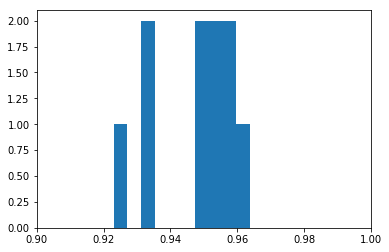



random models:
mean AUC: 0.9533220465825556
median: 0.9531084738164092
stddev: 0.00926712730846021


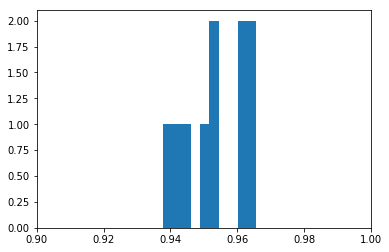



debias models:
mean AUC: 0.9608025868720498
median: 0.9608683681016212
stddev: 0.00621415188872243


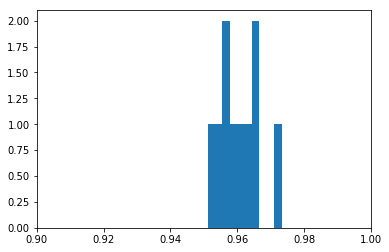



 atn random models:
mean AUC: 0.9545007715681393
median: 0.9582588546741444
stddev: 0.007872575925573324


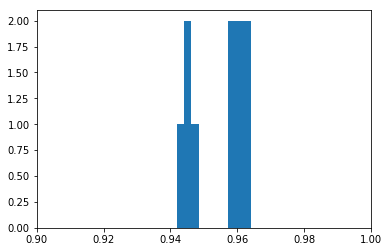



 atn original models:
mean AUC: 0.9603583621837151
median: 0.9612550793220511
stddev: 0.005465941976708592


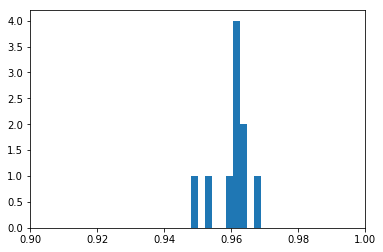



 atn debiased models:
mean AUC: 0.963723168443676
median: 0.9628393853557988
stddev: 0.005911475537850019


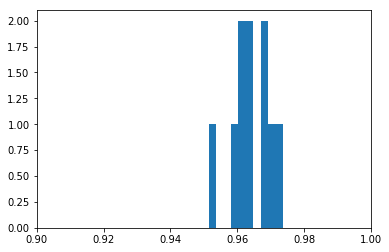

In [27]:
print('original models:')
model_bias_analysis.plot_model_family_auc(madlibs, wiki_model_names, 'label')
print('\n\nrandom models:')
model_bias_analysis.plot_model_family_auc(madlibs, random_model_names, 'label')
print('\n\ndebias models:')
model_bias_analysis.plot_model_family_auc(madlibs, debias_model_names, 'label');
print('\n\n atn random models:')
model_bias_analysis.plot_model_family_auc(madlibs, atn_random_model_names, 'label');
print('\n\n atn original models:')
model_bias_analysis.plot_model_family_auc(madlibs, atn_wiki_model_names, 'label');
print('\n\n atn debiased models:')
model_bias_analysis.plot_model_family_auc(madlibs, atn_debias_model_names, 'label');

In [28]:
for dataset_name, dataset in [('orig test', wiki_test),
                              ('debias test', wiki_debias_test),
                              ('random test', wiki_random_test),
                              ('madlibs', madlibs)]:
    print('\n\nAUCs on', dataset_name)
    for model_family in all_model_families_names:
        fam_name = model_bias_analysis.model_family_name(model_family)
        fam_auc = model_bias_analysis.model_family_auc(dataset, model_family, 'label')
        print('{:30s}  mean {:.4f}\t median {:.4f}\t stddev {:.4f}'.format(fam_name, fam_auc['mean'], fam_auc['median'], fam_auc['std']))



AUCs on orig test
wiki_cnn_v3_10                  mean 0.9590	 median 0.9592	 stddev 0.0022
wiki_debias_random_cnn_v3_10    mean 0.9591	 median 0.9597	 stddev 0.0025
wiki_debias_cnn_v3_10           mean 0.9581	 median 0.9588	 stddev 0.0021
atn_cnn_random_tox_v4_10        mean 0.9604	 median 0.9607	 stddev 0.0039
atn_cnn_wiki_tox_v4_10          mean 0.9601	 median 0.9596	 stddev 0.0020
atn_cnn_debias_tox_v4_10        mean 0.9553	 median 0.9560	 stddev 0.0054


AUCs on debias test
wiki_cnn_v3_10                  mean 0.9560	 median 0.9558	 stddev 0.0019
wiki_debias_random_cnn_v3_10    mean 0.9565	 median 0.9568	 stddev 0.0024
wiki_debias_cnn_v3_10           mean 0.9581	 median 0.9587	 stddev 0.0021
atn_cnn_random_tox_v4_10        mean 0.9577	 median 0.9582	 stddev 0.0035
atn_cnn_wiki_tox_v4_10          mean 0.9574	 median 0.9571	 stddev 0.0018
atn_cnn_debias_tox_v4_10        mean 0.9553	 median 0.9559	 stddev 0.0054


AUCs on random test
wiki_cnn_v3_10                  mean 0.9595	 med

## Per-term pinned AUC

Per-term pinned AUC values show improved scores and less disaprity for the debiased model.

In [41]:
def column_renamer(column_name):
    """Helper to make model column names more easily readable."""
    prefix_mapping = {
        'wiki_cnn_v3_10_': 'orig_',
        'wiki_debias_cnn_v3_10_': 'debias_',
        'wiki_debias_random_cnn_v3_10_': 'random_',
        'atn_cnn_random_tox_v4_10_': 'attention_random_',
        'atn_cnn_wiki_tox_v4_10_': 'attention_wiki_',
        'atn_cnn_debias_tox_v4_10_': 'attention_debias_',
    }
    for prefix_from, prefix_to in prefix_mapping.iteritems():
        if column_name.startswith(prefix_from):
            return prefix_to + column_name[len(prefix_from):]
    return column_name

In [42]:
madlibs_terms = model_bias_analysis.read_identity_terms('bias_madlibs_data/adjectives_people.txt')

In [43]:
model_bias_analysis.add_subgroup_columns_from_text(madlibs, 'text', madlibs_terms)

In [44]:
%%time
_raw_term_madlibs_aucs = model_bias_analysis.per_subgroup_aucs(madlibs, madlibs_terms, all_model_families_names, 'label')

CPU times: user 3.26 s, sys: 24.4 ms, total: 3.29 s
Wall time: 3.23 s


In [45]:
_term_madlibs_aucs = _raw_term_madlibs_aucs.rename(columns=column_renamer).sort_values('orig_mean')
print(_term_madlibs_aucs.columns)
_term_madlibs_aucs[['subgroup', 
                    'attention_random_mean', 'attention_random_std',
                    'attention_wiki_mean', 'attention_wiki_std',
                    'attention_debias_mean', 'attention_debias_std',
                    'orig_mean','orig_std', 
                    'random_mean','random_std', 
                    'debias_mean','debias_std']]

Index([u'attention_debias_aucs', u'attention_debias_mean',
       u'attention_debias_median', u'attention_debias_std',
       u'attention_random_aucs', u'attention_random_mean',
       u'attention_random_median', u'attention_random_std',
       u'attention_wiki_aucs', u'attention_wiki_mean',
       u'attention_wiki_median', u'attention_wiki_std', u'subgroup',
       u'subset_size', u'orig_aucs', u'orig_mean', u'orig_median', u'orig_std',
       u'debias_aucs', u'debias_mean', u'debias_median', u'debias_std',
       u'random_aucs', u'random_mean', u'random_median', u'random_std'],
      dtype='object')


,subgroup,attention_random_mean,attention_random_std,attention_wiki_mean,attention_wiki_std,attention_debias_mean,attention_debias_std,orig_mean,orig_std,random_mean,random_std,debias_mean,debias_std
5,queer,0.891292,0.022858,0.899693,0.022803,0.919749,0.015577,0.892671,0.042194,0.890695,0.026493,0.930178,0.015959
2,bisexual,0.937100,0.016062,0.951545,0.010623,0.965548,0.009606,0.928644,0.031313,0.940484,0.016706,0.959942,0.010005
1,gay,0.936576,0.017209,0.948747,0.008081,0.965039,0.007134,0.931674,0.019837,0.937047,0.012426,0.959577,0.009101
0,lesbian,0.940517,0.014346,0.951476,0.008136,0.963411,0.007885,0.934130,0.023957,0.944190,0.011090,0.959474,0.009110
8,homosexual,0.945266,0.015597,0.954740,0.011642,0.967995,0.007845,0.938732,0.022471,0.945094,0.016736,0.964736,0.006794
28,middle eastern,0.949275,0.013018,0.957760,0.006389,0.960764,0.007761,0.940379,0.015527,0.947799,0.007464,0.953885,0.016507
3,transgender,0.949318,0.014138,0.959471,0.009166,0.968548,0.007207,0.940618,0.027660,0.950455,0.013958,0.963843,0.007808
30,japanese,0.947877,0.007893,0.951844,0.009798,0.958074,0.007565,0.942513,0.009240,0.948450,0.008736,0.956400,0.008723
24,canadian,0.956806,0.007303,0.959761,0.006075,0.960353,0.007090,0.946667,0.010836,0.955395,0.009844,0.956539,0.004074
18,european,0.960941,0.006970,0.963725,0.006953,0.963944,0.008918,0.947188,0.011229,0.956887,0.008972,0.961798,0.006711


per-term AUC histogram: mean AUCs across terms for: orig_mean


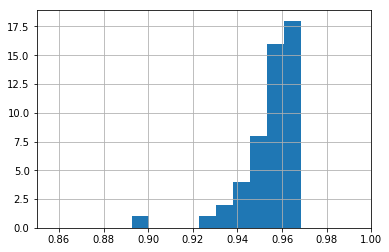

per-term AUC histogram: mean AUCs across terms for: attention_random_mean


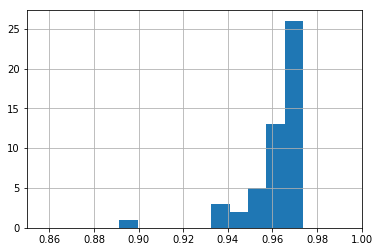

per-term AUC histogram: mean AUCs across terms for: attention_wiki_mean


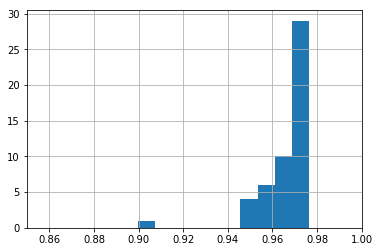

per-term AUC histogram: mean AUCs across terms for: attention_debias_mean


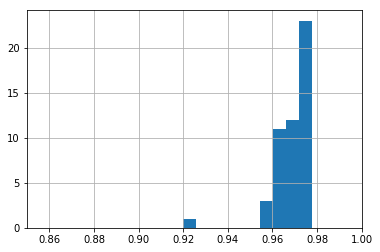

per-term AUC histogram: mean AUCs across terms for: random_mean


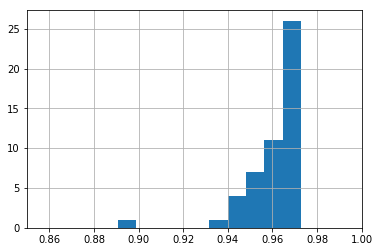

per-term AUC histogram: mean AUCs across terms for: debias_mean


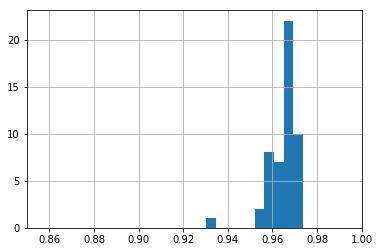

In [46]:
for mean_col in ['orig_mean', 'attention_random_mean', 'attention_wiki_mean', 'attention_debias_mean', 'random_mean', 'debias_mean']:
    print('per-term AUC histogram: mean AUCs across terms for:', mean_col)
    _term_madlibs_aucs[mean_col].hist()
    plt.gca().set_xlim((0.85, 1.0))
    plt.show()

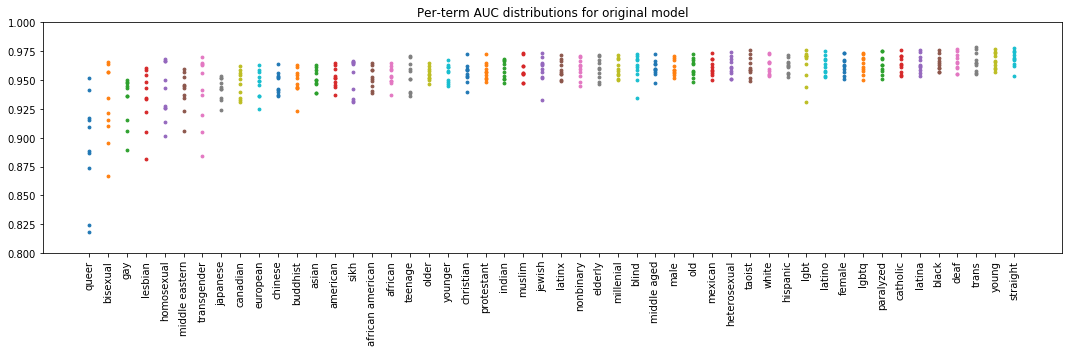

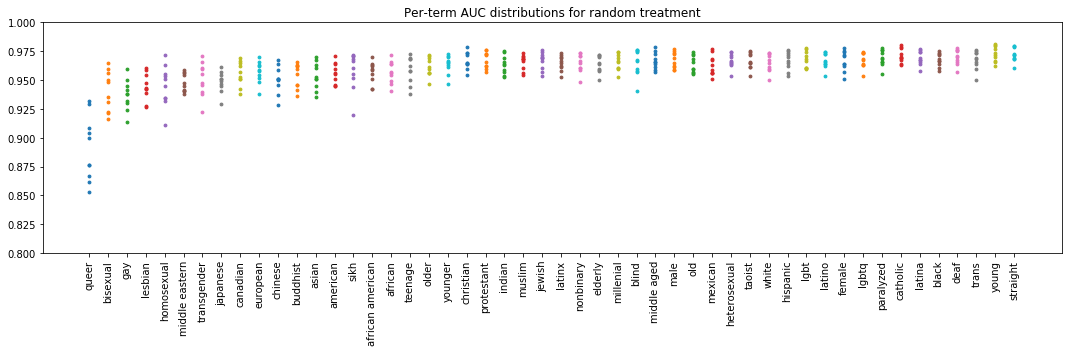

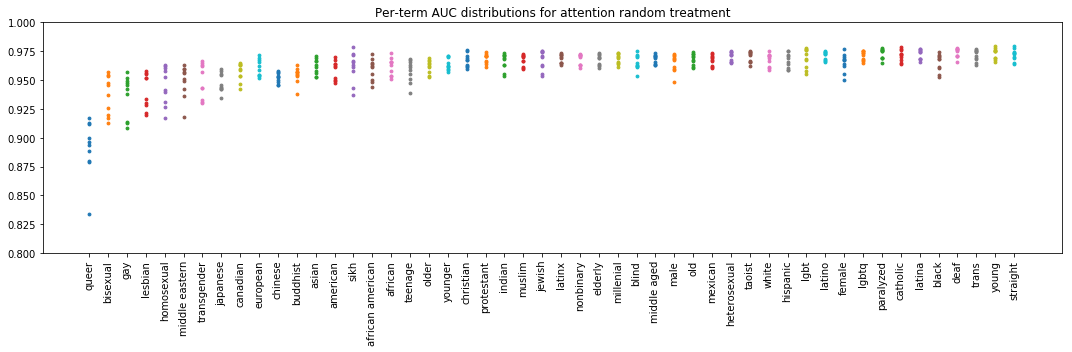

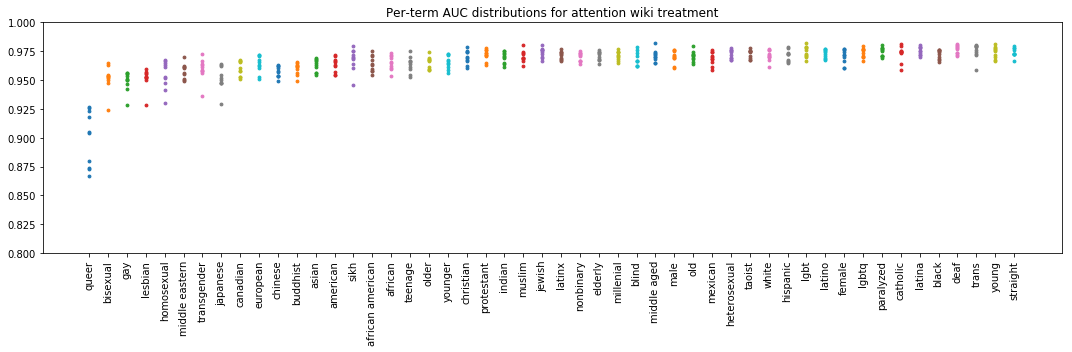

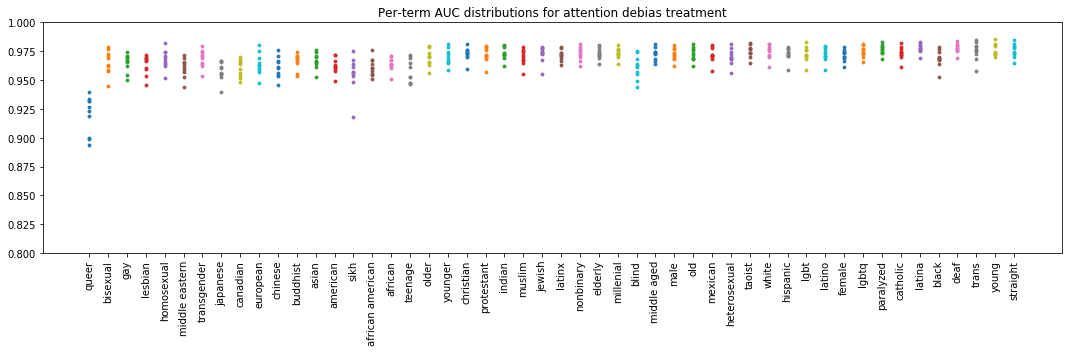

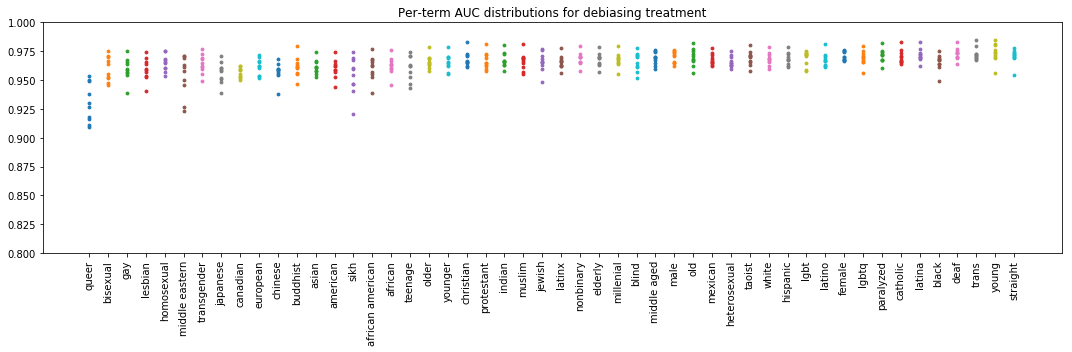

In [47]:
for title, auc_collection_col in [('original model', 'orig_aucs'),
                                  ('random treatment', 'random_aucs'),
                                   ('attention random treatment', 'attention_random_aucs'),
                                    ('attention wiki treatment', 'attention_wiki_aucs'),
                                    ('attention debias treatment', 'attention_debias_aucs'),
                                  ('debiasing treatment', 'debias_aucs')]:
    model_bias_analysis.per_subgroup_scatterplots(
        _term_madlibs_aucs, 'subgroup', auc_collection_col, title='Per-term AUC distributions for ' + title,
        file_name='madlibs')

### Per-term  AUCs on the wikipedia dataset

In [48]:
model_bias_analysis.add_subgroup_columns_from_text(wiki_test, 'text', madlibs_terms)

In [49]:
%%time
_raw_term_wiki_aucs = model_bias_analysis.per_subgroup_aucs(wiki_test, madlibs_terms, all_model_families_names, 'label')

/home/jb/repos/unintended-ml-bias-analysis/venv/local/lib/python2.7/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


CPU times: user 1.57 s, sys: 22.2 ms, total: 1.59 s
Wall time: 1.56 s


In [50]:
_term_wiki_aucs = _raw_term_wiki_aucs.rename(columns=column_renamer).sort_values('orig_mean')

We don't see a strong effect in per-term pinned AUCs on the wikipedia test set. This isn't surprising, as the dataset bias affects the test set too: there are few non-toxic examples using the bias terms, and so the AUC of the original models does not suffer.

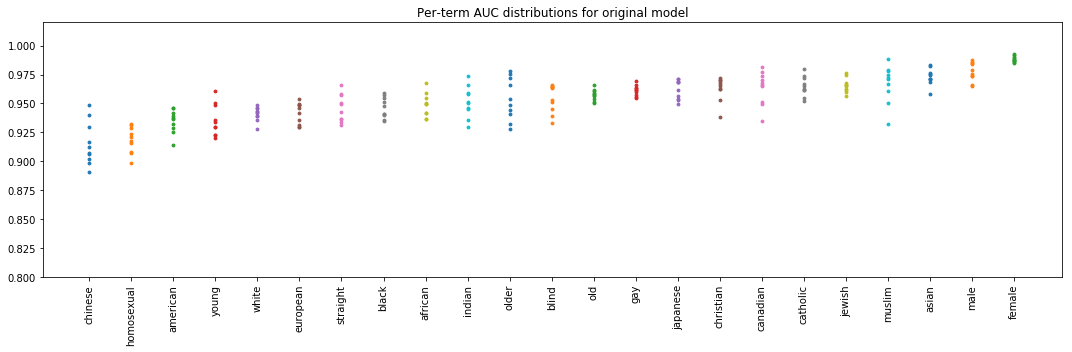

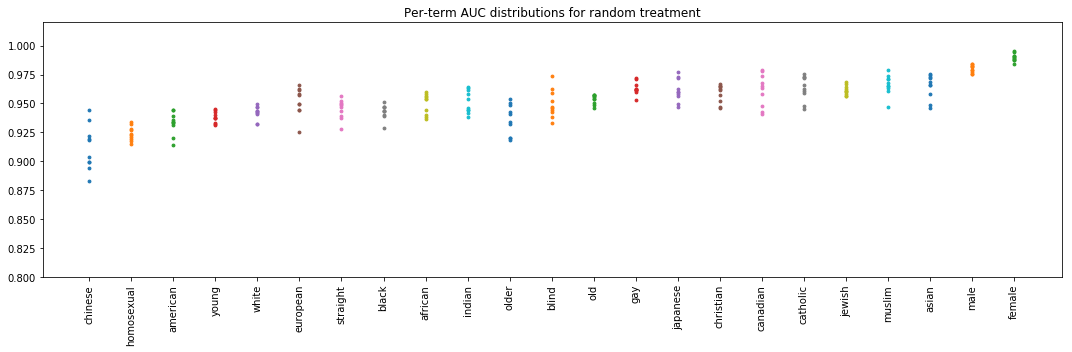

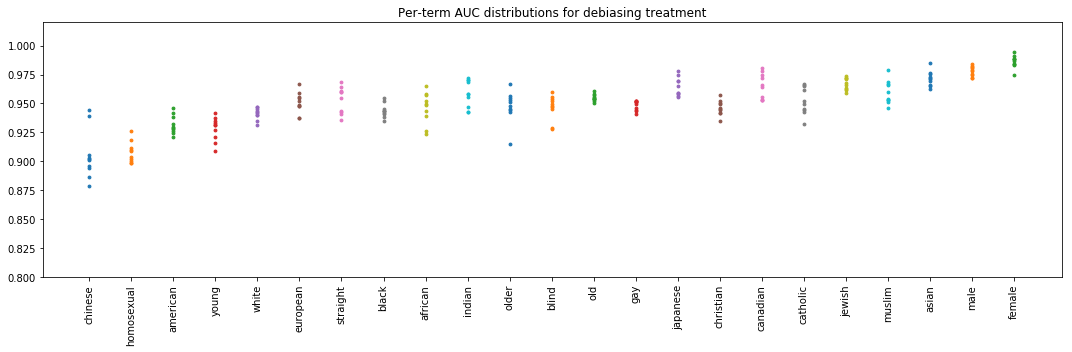

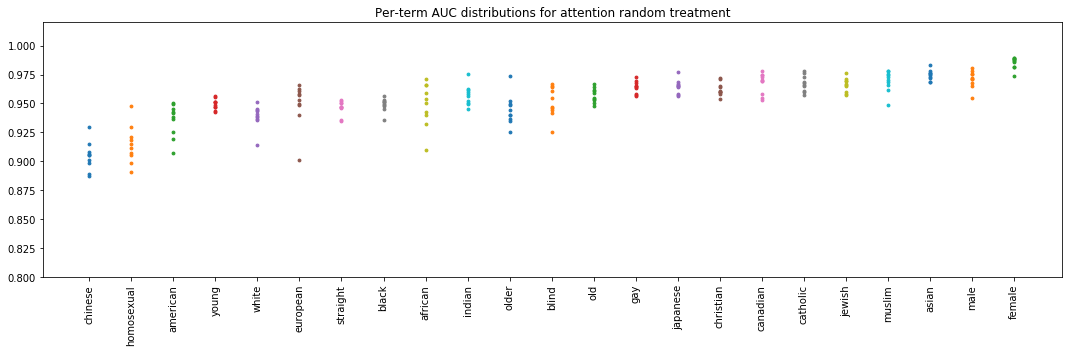

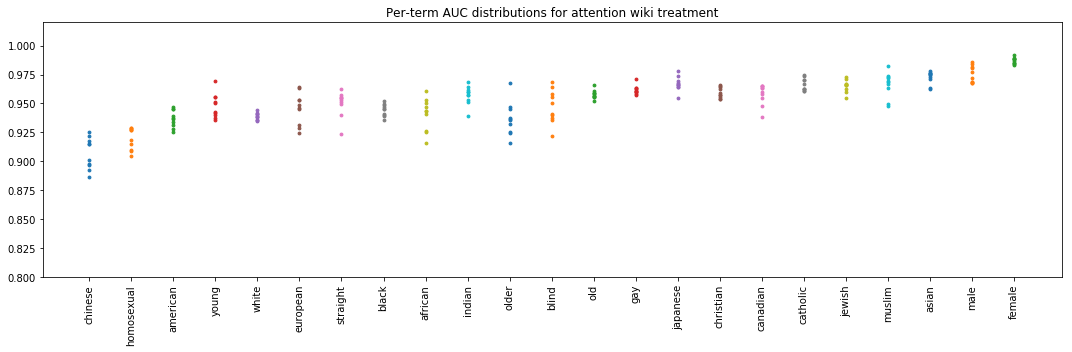

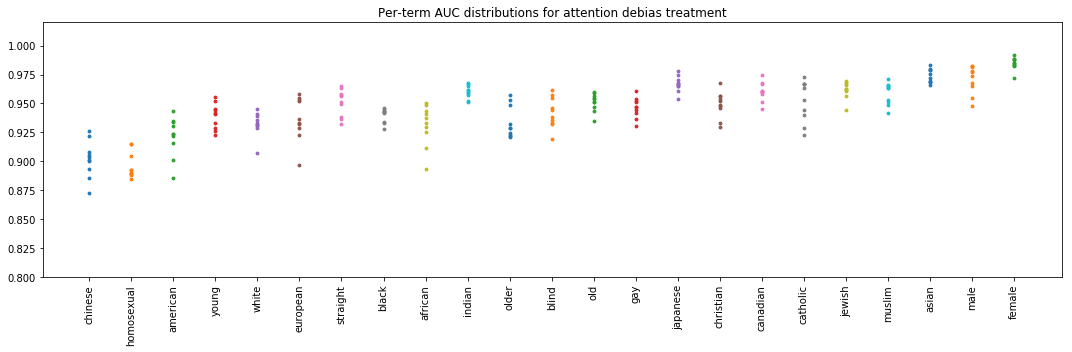

In [53]:
# AUC on tiny datasets is very noisy.
_term_wiki_aucs_nottiny = _term_wiki_aucs[_term_wiki_aucs['subset_size'] > 50]

for title, auc_collection_col in [('original model', 'orig_aucs'),
                                  ('random treatment', 'random_aucs'),
                                   ('debiasing treatment', 'debias_aucs'),
                                    ('attention random treatment', 'attention_random_aucs'),
                                    ('attention wiki treatment', 'attention_wiki_aucs'),
                                    ('attention debias treatment', 'attention_debias_aucs'),
                                 ]:
    model_bias_analysis.per_subgroup_scatterplots(_term_wiki_aucs_nottiny, 'subgroup', auc_collection_col,
                                              title='Per-term AUC distributions for ' + title, y_lim=(0.8, 1.02),
                                              file_name='wiki')

## Qualitative look

In [54]:
# TODO(jetpack): add column to bias madlibs dataset to allow selecting by template
# to more easily observe discrepancies in scores for the same template.

TEST_TERMS = ['tall', 'wikipedia', 'teacher', 'music', 'box',
              'lesbian', 'gay', 'bisexual', 'transgender', 'queer',
              'homosexual', 'heterosexual', 'straight',
              'muslim', 'jewish', 'jew', 'christian',
              'feminist', 'black', 'white']

def _print_template_scores(models):
    texts = ['i am a {} person'.format(term) for term in TEST_TERMS]
    median_scores = [{'median': np.median([model.predict([text]) for model in models]),
                      'stddev': np.std([model.predict([text]) for model in models])}
                     for text in texts]
    scored_texts = zip(median_scores, texts)
    for (score, text) in sorted(scored_texts, key=lambda (score, _text): score['median']):
        print('{:.3f}  (std: {:.4f})  {}'.format(score['median'], score['stddev'], text))
    plt.hist([x['median'] for x in median_scores])
    plt.gca().set_xlim([0, 1])
    plt.gca().set_ylim([0, 10])

0.019  (std: 0.0257)  i am a music person
0.024  (std: 0.0413)  i am a box person
0.057  (std: 0.0457)  i am a teacher person
0.088  (std: 0.0709)  i am a christian person
0.104  (std: 0.1219)  i am a wikipedia person
0.120  (std: 0.0999)  i am a straight person
0.142  (std: 0.0663)  i am a heterosexual person
0.166  (std: 0.1482)  i am a muslim person
0.172  (std: 0.0706)  i am a white person
0.186  (std: 0.1781)  i am a jewish person
0.197  (std: 0.0945)  i am a tall person
0.200  (std: 0.1756)  i am a feminist person
0.384  (std: 0.1356)  i am a black person
0.703  (std: 0.1992)  i am a transgender person
0.747  (std: 0.1936)  i am a lesbian person
0.757  (std: 0.1478)  i am a gay person
0.762  (std: 0.1951)  i am a homosexual person
0.815  (std: 0.1985)  i am a bisexual person
0.860  (std: 0.0677)  i am a jew person
0.884  (std: 0.0822)  i am a queer person


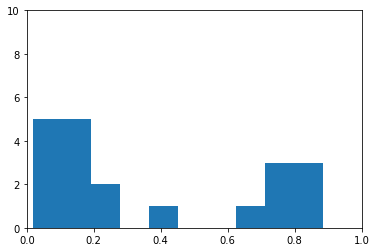

In [55]:
_print_template_scores(wiki_models)

0.021  (std: 0.0086)  i am a music person
0.027  (std: 0.0327)  i am a box person
0.057  (std: 0.0461)  i am a teacher person
0.077  (std: 0.0794)  i am a wikipedia person
0.084  (std: 0.0777)  i am a heterosexual person
0.107  (std: 0.0840)  i am a straight person
0.119  (std: 0.0556)  i am a white person
0.121  (std: 0.1027)  i am a christian person
0.160  (std: 0.1158)  i am a muslim person
0.167  (std: 0.1335)  i am a tall person
0.195  (std: 0.1459)  i am a jewish person
0.223  (std: 0.0709)  i am a feminist person
0.311  (std: 0.0950)  i am a black person
0.594  (std: 0.1650)  i am a lesbian person
0.601  (std: 0.2042)  i am a homosexual person
0.629  (std: 0.1819)  i am a transgender person
0.665  (std: 0.1689)  i am a gay person
0.710  (std: 0.1671)  i am a bisexual person
0.827  (std: 0.1014)  i am a jew person
0.851  (std: 0.0584)  i am a queer person


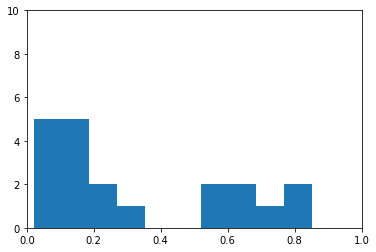

In [56]:
_print_template_scores(random_models)

0.019  (std: 0.0195)  i am a music person
0.035  (std: 0.0185)  i am a box person
0.056  (std: 0.0266)  i am a teacher person
0.077  (std: 0.0681)  i am a straight person
0.088  (std: 0.0670)  i am a christian person
0.094  (std: 0.1014)  i am a feminist person
0.100  (std: 0.0972)  i am a wikipedia person
0.118  (std: 0.0754)  i am a white person
0.119  (std: 0.0712)  i am a heterosexual person
0.160  (std: 0.0787)  i am a tall person
0.189  (std: 0.1284)  i am a transgender person
0.196  (std: 0.1101)  i am a muslim person
0.218  (std: 0.0569)  i am a jewish person
0.241  (std: 0.1042)  i am a gay person
0.244  (std: 0.0976)  i am a lesbian person
0.318  (std: 0.1511)  i am a black person
0.342  (std: 0.1126)  i am a bisexual person
0.364  (std: 0.1351)  i am a homosexual person
0.696  (std: 0.1353)  i am a queer person
0.805  (std: 0.0989)  i am a jew person


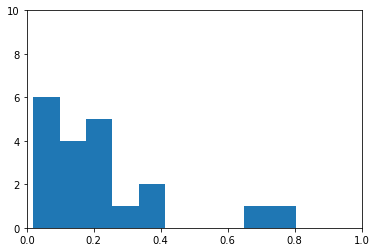

In [57]:
_print_template_scores(debias_models)

In [58]:
_print_template_scores(atn_random_models)

NameError: name 'attention_random_models' is not defined

0.024  (std: 0.0174)  i am a music person
0.054  (std: 0.0157)  i am a box person
0.070  (std: 0.0800)  i am a teacher person
0.106  (std: 0.1257)  i am a tall person
0.114  (std: 0.0898)  i am a christian person
0.121  (std: 0.0597)  i am a straight person
0.121  (std: 0.0433)  i am a white person
0.136  (std: 0.1358)  i am a wikipedia person
0.144  (std: 0.0880)  i am a heterosexual person
0.183  (std: 0.0973)  i am a muslim person
0.204  (std: 0.1236)  i am a feminist person
0.253  (std: 0.1151)  i am a jewish person
0.266  (std: 0.0659)  i am a black person
0.406  (std: 0.1481)  i am a transgender person
0.500  (std: 0.1284)  i am a lesbian person
0.536  (std: 0.1249)  i am a bisexual person
0.570  (std: 0.1363)  i am a gay person
0.582  (std: 0.1505)  i am a homosexual person
0.738  (std: 0.0977)  i am a jew person
0.771  (std: 0.0920)  i am a queer person


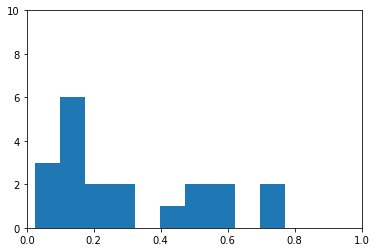

In [59]:
_print_template_scores(atn_wiki_models)

0.031  (std: 0.0345)  i am a music person
0.059  (std: 0.0592)  i am a box person
0.090  (std: 0.0852)  i am a white person
0.091  (std: 0.0589)  i am a straight person
0.093  (std: 0.0504)  i am a christian person
0.108  (std: 0.0480)  i am a teacher person
0.111  (std: 0.0484)  i am a heterosexual person
0.123  (std: 0.0749)  i am a feminist person
0.138  (std: 0.0348)  i am a muslim person
0.166  (std: 0.0560)  i am a jewish person
0.169  (std: 0.0737)  i am a transgender person
0.171  (std: 0.1173)  i am a tall person
0.186  (std: 0.1136)  i am a wikipedia person
0.220  (std: 0.1079)  i am a lesbian person
0.233  (std: 0.1431)  i am a black person
0.236  (std: 0.1047)  i am a gay person
0.261  (std: 0.1053)  i am a bisexual person
0.270  (std: 0.0924)  i am a homosexual person
0.610  (std: 0.0905)  i am a queer person
0.744  (std: 0.1176)  i am a jew person


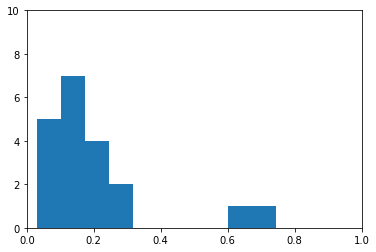

In [61]:
_print_template_scores(atn_debias_models)

### Equality of Opportunity

To evaluate equality of opportunity, we compare false negative rates on a per-term basis.

In [77]:
def neg_table_means(term_neg_rates):
    """Helper to display just the mean values of the negative rates."""
    return (term_neg_rates
            [['subgroup',
              'orig_fnr_mean',
              'attention_debias_fnr_mean',
              'attention_debias_tnr_mean',
               'attention_random_fnr_mean',
              'attention_random_tnr_mean',
              'attention_wiki_fnr_mean',
              'attention_wiki_tnr_mean',
              'random_fnr_mean',
              'debias_fnr_mean',
              'orig_tnr_mean',
              'random_tnr_mean',
              'debias_tnr_mean',
            ]]
            .sort_values('orig_fnr_mean')
           )

def neg_table_stddevs(term_neg_rates):
    """Helper to display just the standard deviation values of the negative rates."""
    return (term_neg_rates
            [['subgroup',
              'orig_tnr_std',
               'attention_debias_fnr_std',
              'attention_debias_tnr_std',
               'attention_random_fnr_std',
              'attention_random_tnr_std',
              'attention_wiki_fnr_std',
              'attention_wiki_tnr_std',
              'random_tnr_std',
              'debias_tnr_std',
              'orig_tnr_std',
              'random_tnr_std',
              'debias_tnr_std',
              'orig_fnr_mean',  # just for sorting
            ]]
            .sort_values('orig_fnr_mean')
            .drop('orig_fnr_mean', axis=1)
           )

### Threshold 0.5

In [78]:
%%time

# threshold = .50 

_raw_term_neg_rates_50 = model_bias_analysis.per_subgroup_negative_rates(madlibs, madlibs_terms, all_model_families_names, 0.5, 'label')

CPU times: user 10.4 s, sys: 49.9 ms, total: 10.5 s
Wall time: 10.3 s


In [79]:
_term_neg_rates_50 = _raw_term_neg_rates_50.rename(columns=column_renamer)

In [80]:
neg_table_means(_term_neg_rates_50)

,subgroup,orig_fnr_mean,attention_debias_fnr_mean,attention_debias_tnr_mean,attention_random_fnr_mean,attention_random_tnr_mean,attention_wiki_fnr_mean,attention_wiki_tnr_mean,random_fnr_mean,debias_fnr_mean,orig_tnr_mean,random_tnr_mean,debias_tnr_mean
5,queer,0.000000,0.001057,0.182299,0.000000,0.027477,0.000000,0.044122,0.000000,0.000661,0.042008,0.029326,0.143989
1,gay,0.000661,0.045443,0.821797,0.000925,0.235271,0.001321,0.286658,0.001321,0.018098,0.160766,0.243593,0.543065
8,homosexual,0.000925,0.035799,0.768428,0.001189,0.271731,0.001189,0.318230,0.000925,0.009511,0.234082,0.276618,0.499472
2,bisexual,0.001057,0.019155,0.672787,0.001057,0.210832,0.001321,0.252708,0.000793,0.013606,0.187054,0.204624,0.456803
0,lesbian,0.001717,0.034478,0.763408,0.001189,0.257464,0.001585,0.311757,0.001321,0.030251,0.198283,0.293395,0.575561
3,transgender,0.001849,0.036724,0.789432,0.001849,0.306869,0.002114,0.381242,0.002378,0.021797,0.246367,0.333421,0.536328
37,sikh,0.005680,0.007133,0.493395,0.004491,0.489828,0.005284,0.520079,0.008190,0.012285,0.364069,0.433950,0.365522
43,teenage,0.006605,0.015852,0.578468,0.004095,0.455746,0.005680,0.514795,0.010172,0.013606,0.448481,0.521136,0.479524
47,blind,0.008587,0.008851,0.600661,0.003963,0.553236,0.004227,0.564993,0.011625,0.006737,0.566843,0.654557,0.517041
6,lgbt,0.012021,0.092999,0.985337,0.021664,0.662748,0.019947,0.795244,0.015059,0.071202,0.611493,0.666711,0.885469


In [81]:
neg_table_stddevs(_term_neg_rates_50)

,subgroup,orig_tnr_std,attention_debias_fnr_std,attention_debias_tnr_std,attention_random_fnr_std,attention_random_tnr_std,attention_wiki_fnr_std,attention_wiki_tnr_std,random_tnr_std,debias_tnr_std,orig_tnr_std,random_tnr_std,debias_tnr_std
5,queer,0.051779,0.001152,0.052212,0.000000,0.037748,0.000000,0.045777,0.038171,0.095616,0.051779,0.038171,0.095616
1,gay,0.101918,0.026143,0.104874,0.001569,0.186717,0.001563,0.111013,0.176520,0.221290,0.101918,0.176520,0.221290
8,homosexual,0.174337,0.023971,0.094739,0.001500,0.205133,0.000925,0.165061,0.212668,0.147287,0.174337,0.212668,0.147287
2,bisexual,0.128894,0.016971,0.117648,0.001152,0.155329,0.001023,0.105984,0.156875,0.204409,0.128894,0.156875,0.204409
0,lesbian,0.130267,0.025468,0.127236,0.001500,0.171530,0.001541,0.089869,0.177127,0.235893,0.130267,0.177127,0.235893
3,transgender,0.159502,0.025028,0.102286,0.002226,0.203444,0.001211,0.102991,0.189124,0.217595,0.159502,0.189124,0.217595
37,sikh,0.152978,0.003928,0.162497,0.002906,0.190440,0.005636,0.174935,0.204376,0.269680,0.152978,0.204376,0.269680
43,teenage,0.193909,0.014471,0.113892,0.001500,0.169442,0.003739,0.197227,0.209671,0.210735,0.193909,0.209671,0.210735
47,blind,0.139847,0.003547,0.103209,0.002436,0.134044,0.003632,0.186015,0.162415,0.151262,0.139847,0.162415,0.151262
6,lgbt,0.174900,0.016638,0.019828,0.026249,0.197602,0.021846,0.110210,0.172262,0.116187,0.174900,0.172262,0.116187


### Threshold using per-model equal error rate on overall madlibs dataset

In [70]:
%%time

# Compute the equal error rate for all models on the overall madlibs dataset in order to
# compute the false/true negative rates table at the EER for each model.

# Flattened list of all models.
_all_model_names = []
for model_family_names in all_model_families_names:
    _all_model_names.extend(model_family_names)
_model_eers_madlibs = model_bias_analysis.per_model_eer(madlibs, 'label', _all_model_names)

CPU times: user 1min 12s, sys: 486 ms, total: 1min 12s
Wall time: 1min 11s


In [87]:
%%time
_raw_term_neg_rates_madlibs_eer = model_bias_analysis.per_subgroup_negative_rates(
    madlibs, madlibs_terms, all_model_families_names, _model_eers_madlibs, 'label')

CPU times: user 10.3 s, sys: 40.2 ms, total: 10.4 s
Wall time: 10.2 s


In [88]:
_term_neg_rates_madlibs_eer = _raw_term_neg_rates_madlibs_eer.rename(columns=column_renamer)

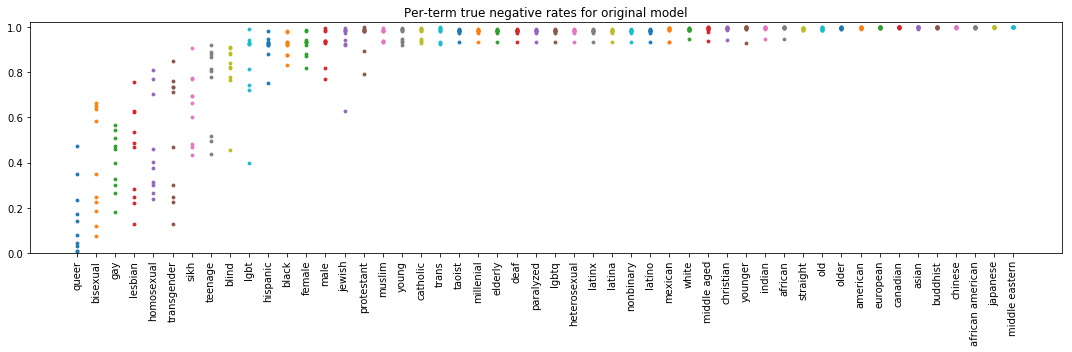

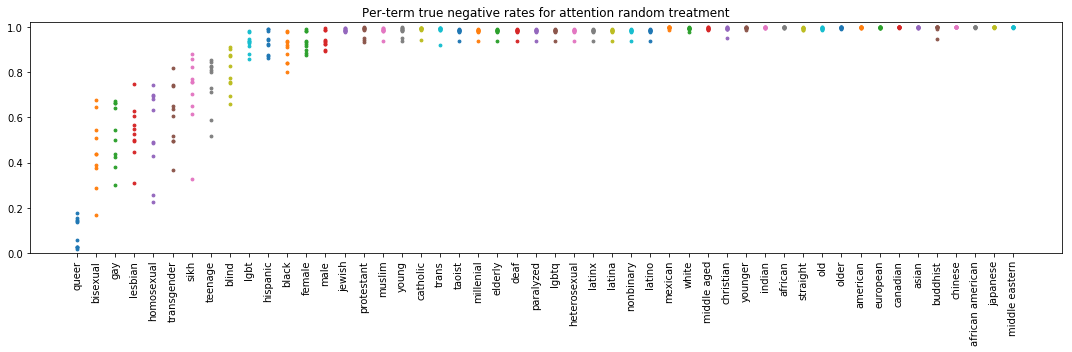

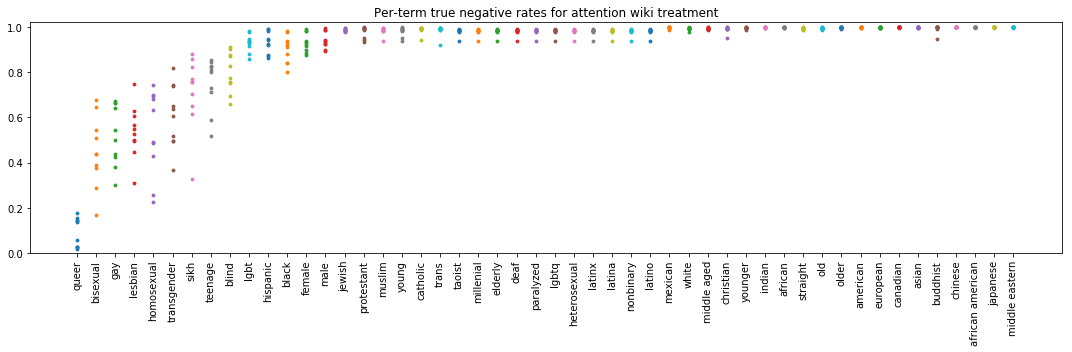

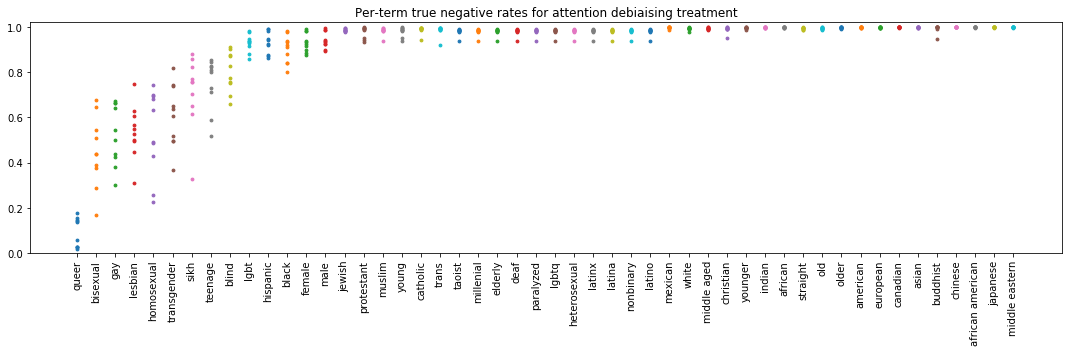

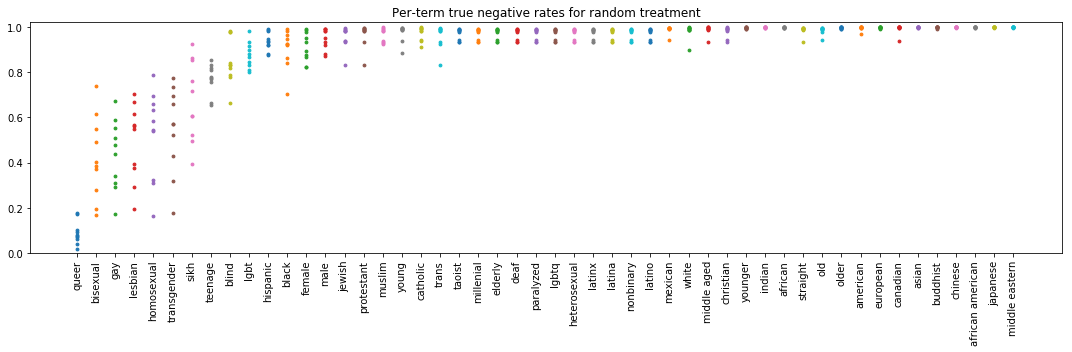

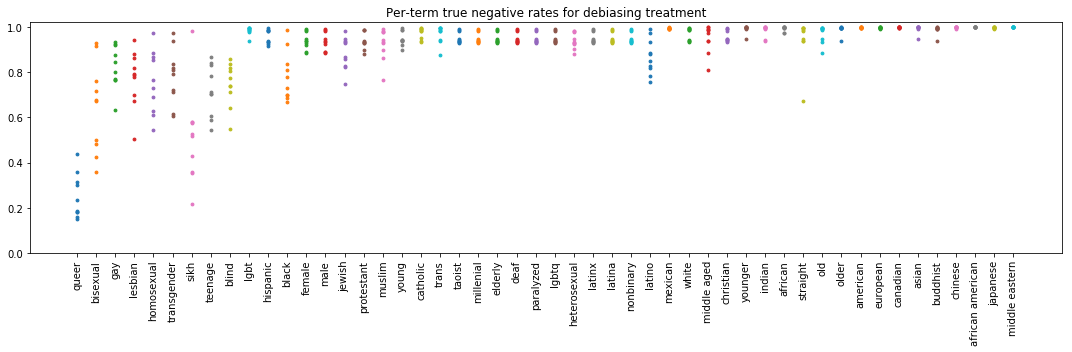

In [89]:
# True negative rates: TN / (TN + FP)

_term_neg_rates_madlibs_eer_tnr_sorted = _term_neg_rates_madlibs_eer.sort_values('orig_tnr_mean')

for title, tnr_values_col in [('original model', 'orig_tnr_values'),
                            ('attention random treatment', 'attention_wiki_tnr_values'),
                            ('attention wiki treatment', 'attention_wiki_tnr_values'),
                            ('attention debiaising treatment', 'attention_wiki_tnr_values'),
                              ('random treatment', 'random_tnr_values'),
                              ('debiasing treatment', 'debias_tnr_values')]:
    model_bias_analysis.per_subgroup_scatterplots(
        _term_neg_rates_madlibs_eer_tnr_sorted, 'subgroup', tnr_values_col, y_lim=(0, 1.02),
        title='Per-term true negative rates for ' + title, file_name='madlibs')

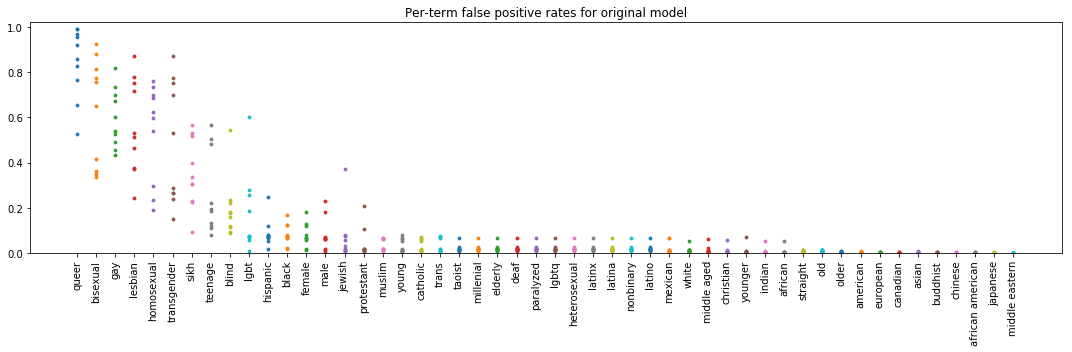

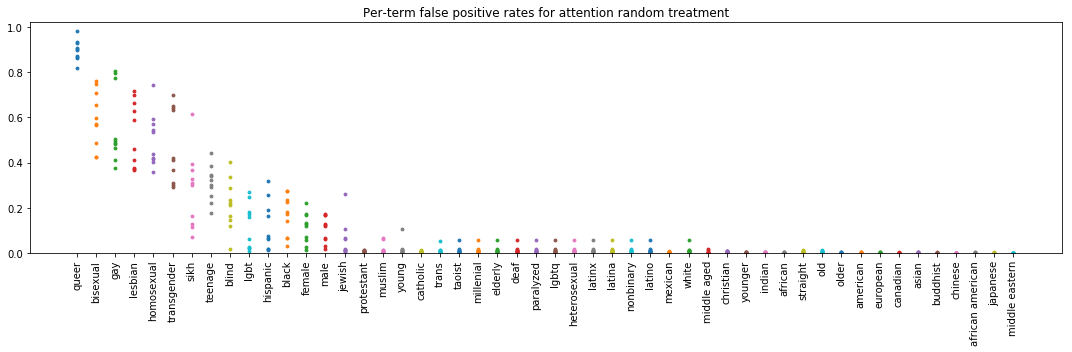

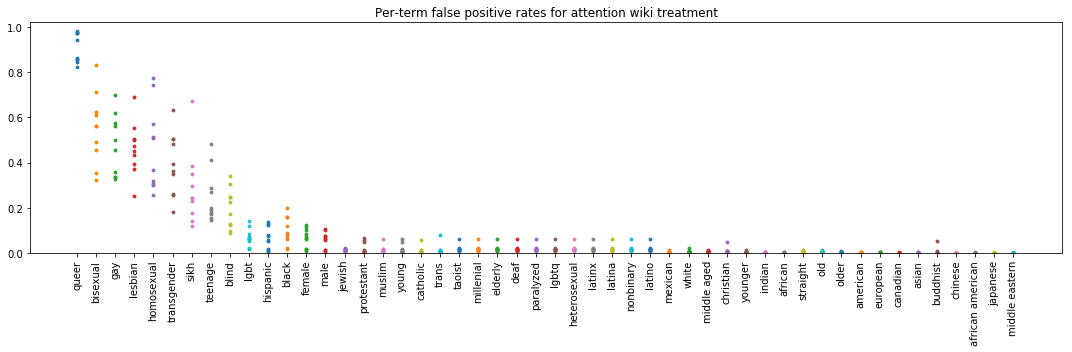

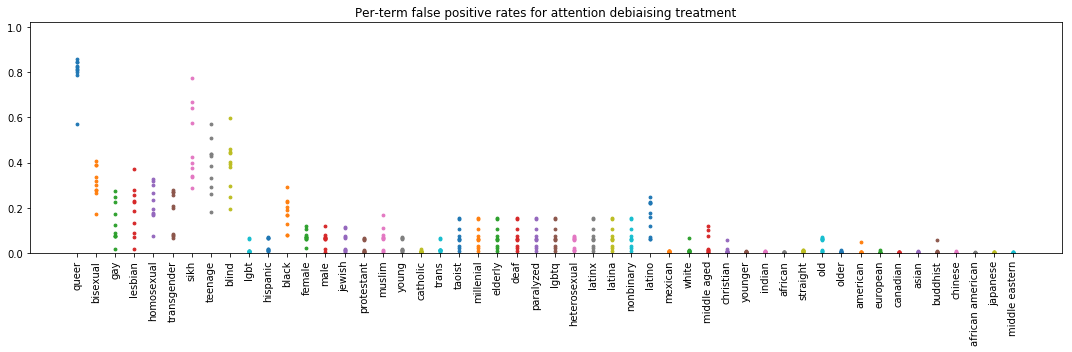

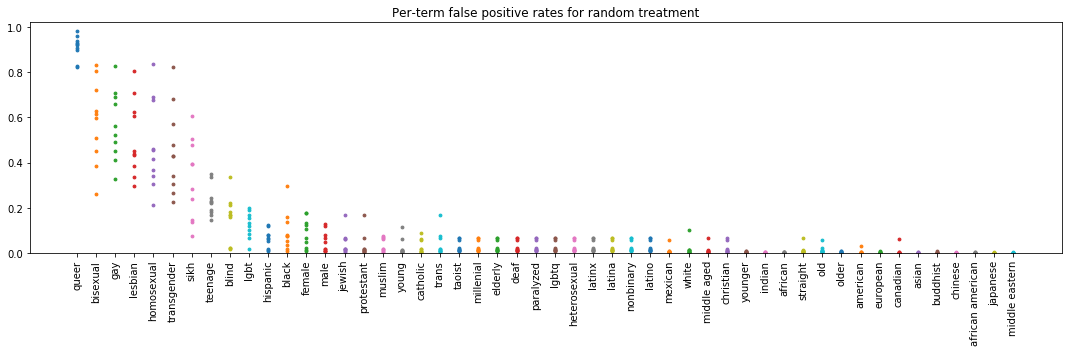

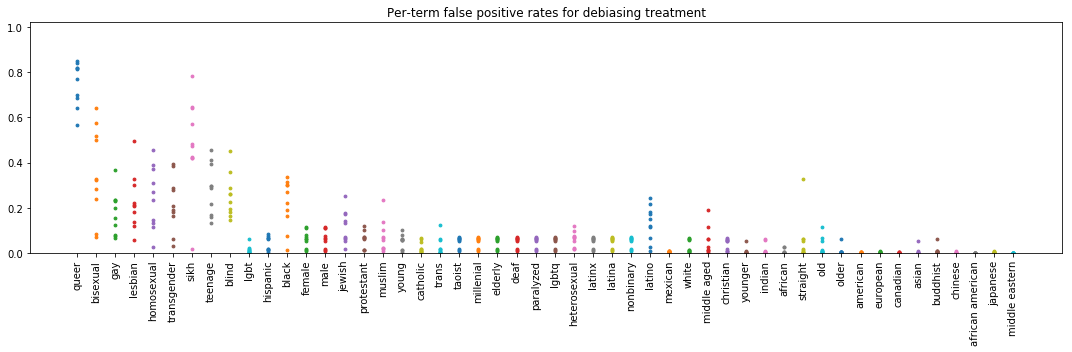

In [95]:
# False positive rates: 1 - TNR. This is just the above graphs except flipped to show false positives instead of true negatives.

_term_neg_rates_madlibs_eer_tnr_sorted = _term_neg_rates_madlibs_eer.sort_values('orig_tnr_mean')

for title, tnr_values_col in [('original model', 'orig_tnr_values'),
                                ('attention random treatment', 'attention_random_tnr_values'),
                            ('attention wiki treatment', 'attention_wiki_tnr_values'),
                            ('attention debiaising treatment', 'attention_debias_tnr_values'),
                              ('random treatment', 'random_tnr_values'),
                              ('debiasing treatment', 'debias_tnr_values')]:
    term_fpr_values = []
    for _i, row in _term_neg_rates_madlibs_eer_tnr_sorted.iterrows():
        tnr_values = row[tnr_values_col]
        fpr_values = [1 - tnr for tnr in tnr_values]
        term_fpr_values.append({'subgroup': row['subgroup'], 'fpr_values': fpr_values})
    fpr_df = pd.DataFrame(term_fpr_values)
    model_bias_analysis.per_subgroup_scatterplots(
        fpr_df, 'subgroup', 'fpr_values', y_lim=(0, 1.02),
        title='Per-term false positive rates for ' + title,
        file_name='madlibs_' + tnr_values_col)

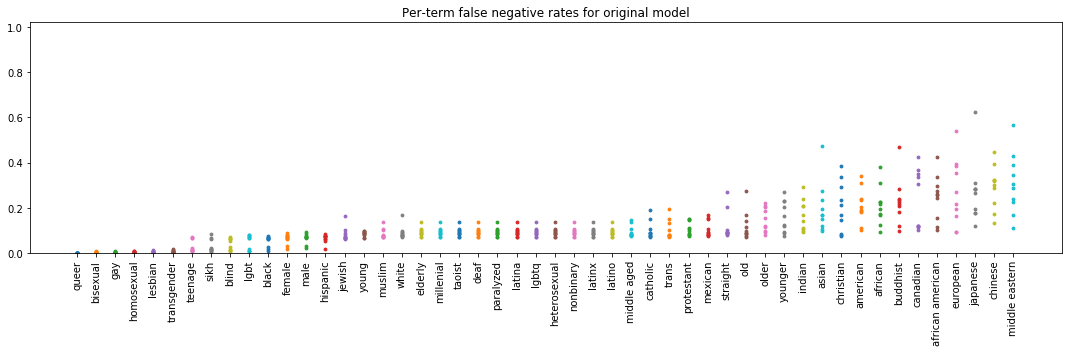

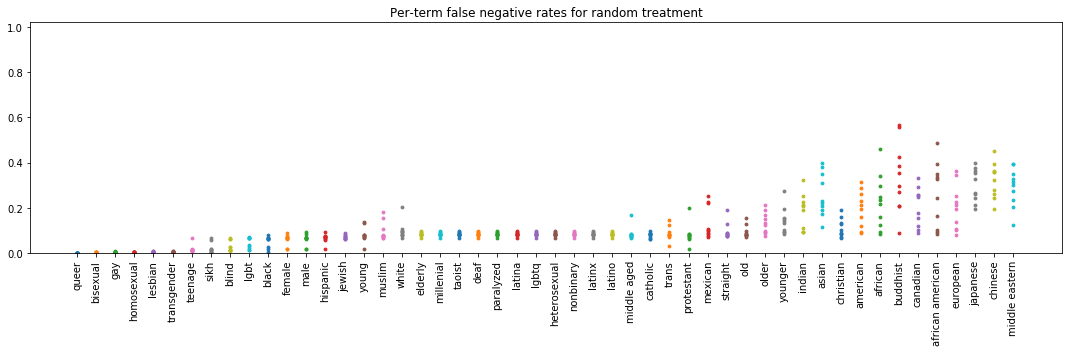

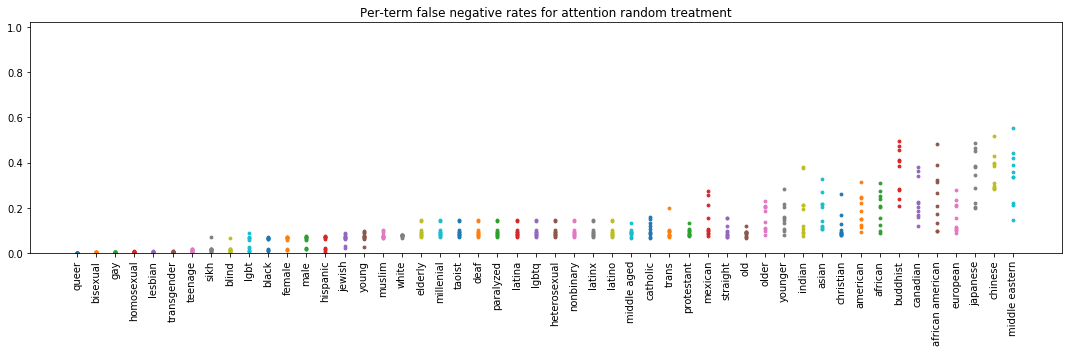

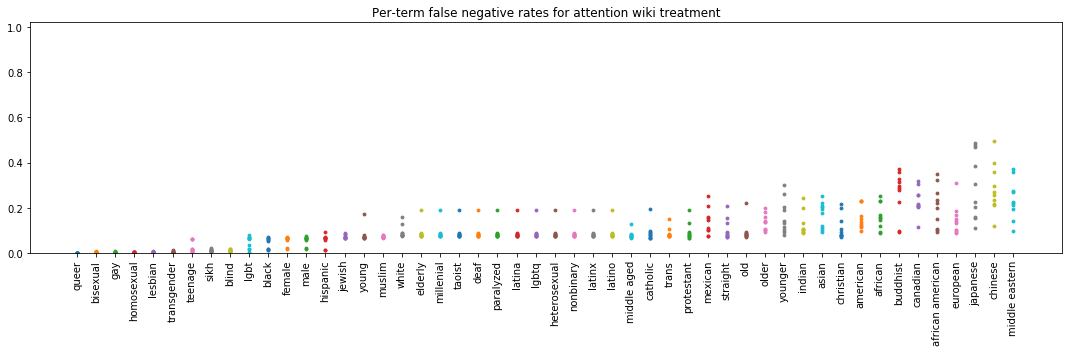

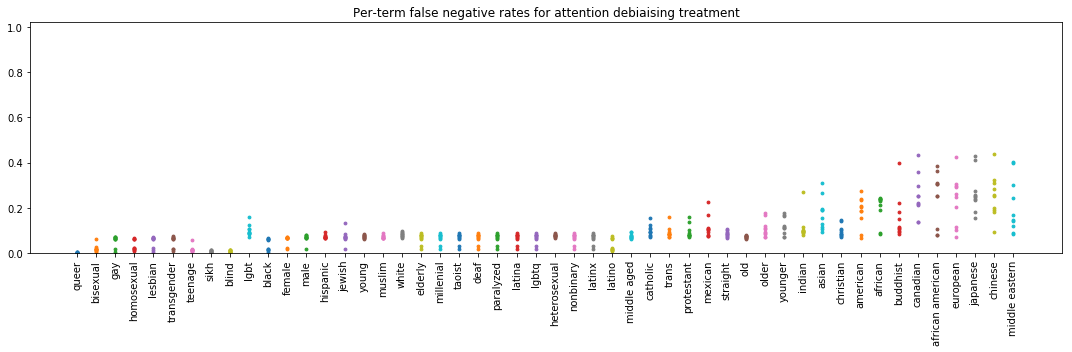

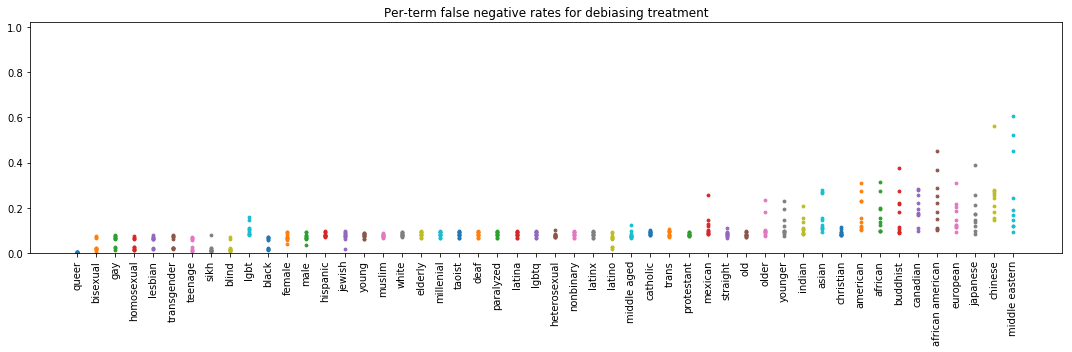

In [94]:
# False negative rates: FN / (FN + TP). 1 - TPR.

# Should we use the same ordering as the true negative rate plots?
_term_neg_rates_madlibs_eer_fnr_sorted = _term_neg_rates_madlibs_eer.sort_values('orig_fnr_mean')

for title, fnr_values_col in [('original model', 'orig_fnr_values'),
                              ('random treatment', 'random_fnr_values'),
                             ('attention random treatment', 'attention_random_fnr_values'),
                            ('attention wiki treatment', 'attention_wiki_fnr_values'),
                            ('attention debiaising treatment', 'attention_debias_fnr_values'),

                              ('debiasing treatment', 'debias_fnr_values')]:
    #_term_neg_rates_madlibs_eer_fnr_sorted
    model_bias_analysis.per_subgroup_scatterplots(
        _term_neg_rates_madlibs_eer_fnr_sorted, 'subgroup', fnr_values_col, y_lim=(0, 1.02),
        title='Per-term false negative rates for ' + title,
        file_name='madlibs')

### Threshold using per-model equal error rate on Wikipedia test set

In [ ]:
%%time

# Compute the equal error rate for all models on the wikipedia dataset.

_model_eers_wiki = model_bias_analysis.per_model_eer(wiki_test, 'label', _all_model_names)

In [ ]:
%%time
_raw_term_neg_rates_wiki_eer = model_bias_analysis.per_subgroup_negative_rates(
    madlibs, madlibs_terms, all_model_families_names, _model_eers_wiki, 'label')
_term_neg_rates_wiki_eer = _raw_term_neg_rates_wiki_eer.rename(columns=column_renamer)

In [ ]:
# True negative rates: TN / (TN + FP)

_term_neg_rates_wiki_eer_tnr_sorted = _term_neg_rates_wiki_eer.sort_values('orig_tnr_mean')

for title, tnr_values_col in [('original model', 'orig_tnr_values'),
                              ('random treatment', 'random_tnr_values'),
                                ('attention treatment', 'attention_tnr_values'),
                              ('debiasing treatment', 'debias_tnr_values')]:
    model_bias_analysis.per_subgroup_scatterplots(
        _term_neg_rates_wiki_eer_tnr_sorted, 'subgroup', tnr_values_col, y_lim=(0, 1.02),
        title='Per-term true negative rates for ' + title, file_name='wiki')

In [ ]:
# False negative rates: FN / (FN + TP). 1 - TPR.

# Should we use the same ordering as the true negative rate plots?
_term_neg_rates_wiki_eer_fnr_sorted = _term_neg_rates_wiki_eer.sort_values('orig_fnr_mean')

for title, fnr_values_col in [('original model', 'orig_fnr_values'),
                              ('random treatment', 'random_fnr_values'),
                                ('attention treatment', 'attention_fnr_values'),
                              ('debiasing treatment', 'debias_fnr_values')]:
    model_bias_analysis.per_subgroup_scatterplots(
        _term_neg_rates_wiki_eer_fnr_sorted, 'subgroup', fnr_values_col, y_lim=(0, 1.02),
        title='Per-term false negative rates for ' + title, file_name='wiki')

In [74]:
model_bias_analysis.per_subgroup_fnr_diff_from_overall(madlibs, madlibs_terms, all_model_families_names, _model_eers_madlibs, False)

,model_family,fnr_equality_difference
0,atn_cnn_random_tox_v4_10,35.566648
1,wiki_debias_cnn_v3_10,21.886601
2,wiki_debias_random_cnn_v3_10,34.470191
3,wiki_cnn_v3_10,33.045221
4,atn_cnn_wiki_tox_v4_10,29.434942
5,atn_cnn_debias_tox_v4_10,26.448370


In [75]:
model_bias_analysis.per_subgroup_tnr_diff_from_overall(madlibs, madlibs_terms, all_model_families_names, _model_eers_madlibs, False)

,model_family,tnr_equality_difference
0,atn_cnn_random_tox_v4_10,73.264144
1,wiki_debias_cnn_v3_10,50.547204
2,wiki_debias_random_cnn_v3_10,68.165446
3,wiki_cnn_v3_10,73.604680
4,atn_cnn_wiki_tox_v4_10,64.386978
5,atn_cnn_debias_tox_v4_10,51.508541


In [76]:
model_bias_analysis.per_subgroup_auc_diff_from_overall(madlibs, madlibs_terms, all_model_families_names, False)

,model_family,pinned_auc_equality_difference
0,atn_cnn_random_tox_v4_10,6.480566
1,wiki_debias_cnn_v3_10,3.731909
2,wiki_debias_random_cnn_v3_10,6.088821
3,wiki_cnn_v3_10,6.625500
4,atn_cnn_wiki_tox_v4_10,5.245089
5,atn_cnn_debias_tox_v4_10,4.168301
